## **Diabetes Prediction KNN**
Using a dataset with information about patients, create a model that can accurately determine if the patient has diabetes.

We will be using a KNN model for classification.


**What is kNN?** \
This is a supervised, but non-parametric classification and regression algorithm. Unlike kMeans, this is not a clustering algorithm. Instead it follows what is called a lazy learning algorithm, as it does not actually process the trianing data until a prediction is made. \
To make a prediction for a new data point, KNN finds the K nearest neighbors of that data point and computes the class label (classification) or continuous target (regression) based on the k nearest points (aka the most similar points).

In [73]:
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import numpy as np

### Step 1
Explore the data and gain an understanding of the information you have.

In [74]:
diabetes = pd.read_csv("diabetes.csv")
print(diabetes)
print(diabetes.info())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

From this, we can seen that we have 8 different numerical pieces of information about each patient, with an ["Outcome"] column.

### Step 2
Create the Feature Matrix (X) and Target Vector (Y). The target variable in our case is "Outcome", so the feature matrix will be everything but the "Outcome", and the target vector will be just the "Outcome" column.

In [75]:
X = diabetes.drop("Outcome",axis=1)
Y = diabetes["Outcome"]

Prepare the dataframes for the model by standardizing the attributes. In our case, we will be using StandardScaler() from sklearn. (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [76]:
X = StandardScaler().fit_transform(X)

### Step 3
Split the Feature Matrix and Target Vector into 3 partitions: training A, training B and testing. \
When we split the dataframes using the train_test_split function, we can decide on its test_size, which is a measure of what percentage of the data will be given to the testing dataframe. One of the main reasons for this is because if you train it on the whole dataset, then the model will be prone to overfitting.

In [77]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, Y, test_size=0.4, random_state=2023)
X_train_A, X_train_B, y_train_A, y_train_B = train_test_split(X_train_temp,y_train_temp,test_size=0.5,random_state=2023, stratify=y_train_temp)

### Step 4
Develop a KNN based model based on the the dataframes. Use a K ranging between 1 and 30.

In [78]:
ks = range(1,31)

accuracies_train_A = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_A,y_train_A)
  y_pred_train_A = knn.predict(X_train_A)
  accuracy_train_A=accuracy_score(y_train_A,y_pred_train_A)
  accuracies_train_A.append(accuracy_train_A)

accuracies_train_B = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_B,y_train_B)
  y_pred_train_B = knn.predict(X_train_B)
  accuracy_train_B=accuracy_score(y_train_B,y_pred_train_B)
  accuracies_train_B.append(accuracy_train_B)

### Step 5

Determining the best number of neighbors (k) is a difficult task for KNN algorithms. If we consider too few neighbors, then we might end up classifying a case based on accidental occurences instead of a real pattern, meaning our noise could end up skewing the classification. However, if we consider too many neighbors, we might loose sharpness. This would essentially mean that you might be classifying based on overall majority, rather than through its local characteristics. \


One method of overcoming this obstacle and getting a good k is through the Elbow Method. This is a method in which you plot out the accuracies, and then determine the best k value by where the "tip" of the elbow seems to be at.

So, let's plot a graph of training A and training B accuracy and determine the best value of k.

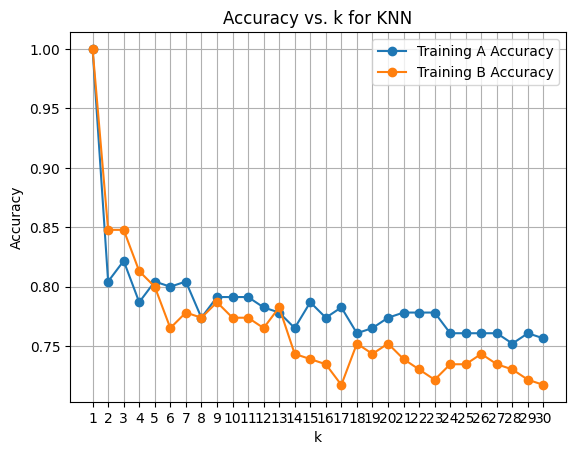

In [79]:
plt.plot(ks,accuracies_train_A,marker="o",label='Training A Accuracy')
plt.plot(ks,accuracies_train_B,marker="o",label='Training B Accuracy')
plt.title('Accuracy vs. k for KNN')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,31,1))
plt.legend()
plt.grid(True)
plt.show()

From this graph, we can estimate that the best k value would be 9.

In [80]:
best_k = 9

### Step 6
Now that we have decided on a good K value, we can fit the model and see what our test accuracy is.

In [81]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_temp,y_train_temp)
y_pred_test = knn.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred_test)
print("Test accuracy:",test_accuracy)

Test accuracy: 0.7402597402597403


We can also understand the accuracy of this model using a Confusion Matrix. The accuracy of a confusion matrix is understood by dividing the good cases (True Positives and True Negatives) by the total number of cases.

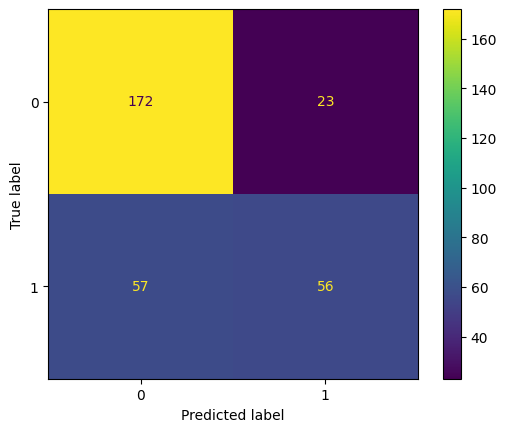

In [82]:
cm = metrics.confusion_matrix(y_test,y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_).plot()
plt.show()

In this case, the accuracy based on the confusion matrix would be (159+51)/(159+36+63+51) = 68%.

### Step 7
Finally, we can use the model that we have created to make a prediction for new data points. \
For example, let's look at a patient who has had 2 pregnancies, 150 glucose, 85 blood pressure, 22 skin thickness, 200 insulin, 30 BMI, 0.3 diabetes pedigree, and 55 age.

In [83]:
X_sample = [[2,150,85,22,200,30,0.3,55]]
predicted_outcome = knn.predict(X_sample)
print("The predicted outcome for this person is:",predicted_outcome)

The predicted outcome for this person is: [1]


This means that the model predicts that based on these features, the person has diabetes.